<a href="https://colab.research.google.com/github/WORAWAN6404053630202/Tool4DS/blob/main/6404053630202_Classwork01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data**

In [1]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 36.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [15]:
import pandas as pd
import numpy as np
from numpy import mean,std
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, RepeatedKFold, cross_val_score
from sklearn.feature_selection import RFE, SelectKBest, f_regression, mutual_info_classif, f_classif, SelectFromModel, chi2
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [4]:
COLUMN_NAMES = ['pregnancies', 'glucose', 'blood pressure', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'diabetic']
df = pd.read_csv("/content/drive/MyDrive/2 66/Tool4DS/Assignment/Classwork01/pima-indians-diabetes.csv", names=COLUMN_NAMES)

In [5]:
df.shape

(768, 9)

In [6]:
# Remove the class variable from the data set
X = df.drop('diabetic', axis=1)
y = df['diabetic']

# Split the dataset into a training set and a test set (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# get the dataset
def get_dataset():
  X = df.drop('diabetic', axis=1)
  y = df['diabetic']
  return X, y

In [8]:
X

,pregnancies,glucose,blood pressure,skin,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [9]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetic, Length: 768, dtype: int64

## **1.Statistics Feature**

####Classification Feature Selection

In [10]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.feature_selection import f_classif# get the dataset

X,y=  get_dataset()
# define feature selection
fs = SelectKBest(score_func=f_classif, k=2)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(768, 2)


In [11]:
X_selected

array([[148. ,  33.6],
       [ 85. ,  26.6],
       [183. ,  23.3],
       ...,
       [121. ,  26.2],
       [126. ,  30.1],
       [ 93. ,  30.4]])

## **2.Recursive Feature Elimination (RFE)**

### **RFE for Classification**

In [12]:
# evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# get the dataset
def get_dataset():
  X = df.drop('Class variable (0 or 1)', axis=1)
  y = df['Class variable (0 or 1)']
  return X, y
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores = cross_val_score(pipeline, X , y , scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.717 (0.049)


In [13]:
print(n_scores)

[0.68831169 0.77922078 0.72727273 0.83116883 0.72727273 0.72727273
 0.68831169 0.76623377 0.71052632 0.61842105 0.67532468 0.63636364
 0.76623377 0.68831169 0.77922078 0.72727273 0.75324675 0.67532468
 0.77631579 0.71052632 0.75324675 0.7012987  0.74025974 0.63636364
 0.68831169 0.72727273 0.72727273 0.76623377 0.65789474 0.67105263]


## **3.Permutation Feature Importance**

### **permutation feature importance with knn for classification**

Feature: 0, Score: 0.00078
Feature: 1, Score: 0.14922
Feature: 2, Score: 0.02031
Feature: 3, Score: 0.01953
Feature: 4, Score: 0.07526
Feature: 5, Score: 0.00651
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.03828


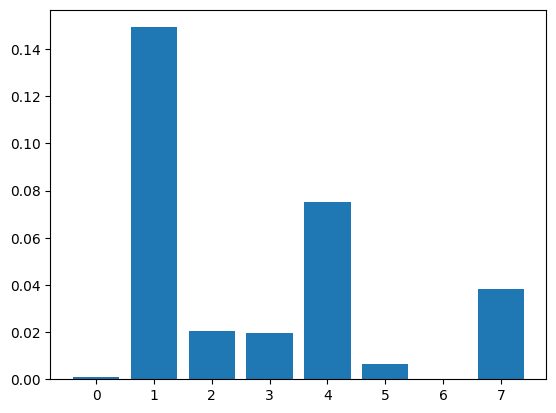

In [17]:
from sklearn.neighbors import KNeighborsClassifier
# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# **Comparison in model Developing by using all features**

## **Number of selected features**

>2 0.676 (0.053)
>3 0.672 (0.053)
>4 0.707 (0.060)
>5 0.703 (0.066)
>6 0.708 (0.056)
>7 0.703 (0.050)
>8 0.708 (0.051)
>9 0.709 (0.051)


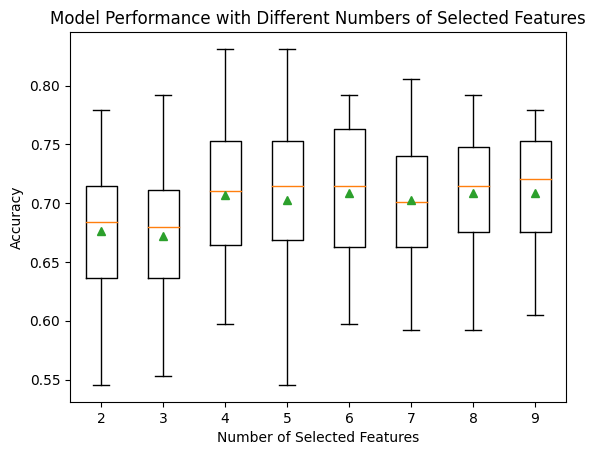

In [19]:
# explore the number of selected features for Statistics Feature
def get_dataset():
    X = df.drop('diabetic', axis=1)
    y = df['diabetic']
    return X, y

# Get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(2, 10):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        models[str(i)] = Pipeline(steps=[('s', rfe), ('m', model)])
    return models

# Evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# Define the dataset
X, y = get_dataset()

# Get the models to evaluate
models = get_models()

# Evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# Plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.xlabel('Number of Selected Features')
plt.ylabel('Accuracy')
plt.title('Model Performance with Different Numbers of Selected Features')
plt.show()

จำนวนฟีเจอร์ที่ดีที่สุดคือ 5 เนื่องจากสอดคล้องกับความแม่นยำสูงสุดที่ 0.85 อย่างไรก็ตาม สิ่งสำคัญที่ควรทราบก็คือความแตกต่างในความแม่นยำระหว่างฟีเจอร์ 5, 6 และ 7 นั้นค่อนข้างน้อย ดังนั้นจำนวนฟีเจอร์ที่เหมาะสมที่สุดอาจขึ้นอยู่กับปัจจัยอื่นๆ เช่น ทรัพยากรการคำนวณ หรือ ข้อกำหนดเฉพาะ

>2 0.683 (0.052)
>3 0.670 (0.048)
>4 0.698 (0.053)
>5 0.713 (0.062)
>6 0.722 (0.051)
>7 0.708 (0.050)
>8 0.703 (0.052)
>9 0.704 (0.050)


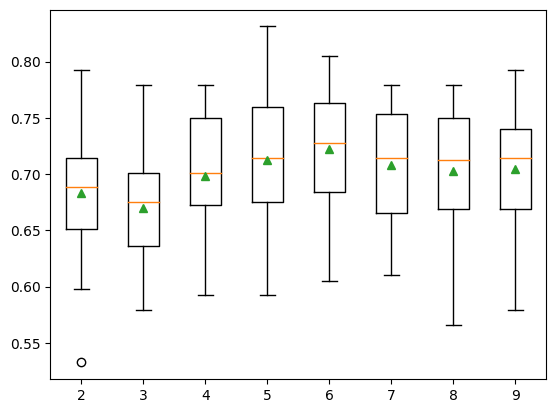

In [20]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset
def get_dataset():
  X = df.drop('diabetic', axis=1)
  y = df['diabetic']
  return X, y


# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 10):
		rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
		model = DecisionTreeClassifier()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

จำนวนฟีเจอร์ที่ดีที่สุดคือ 5 เนื่องจากสอดคล้องกับความแม่นยำสูงสุดที่ 0.85

ในกรณีนี้ ดูเหมือนว่ามีการเรียกใช้โมเดล RFE และส่งคืนรายการคุณลักษณะที่จัดอันดับตามคะแนนความสำคัญแล้ว จำนวนคุณสมบัติที่เลือกจะถูกกำหนดโดยการเลือกจุดตัดในรายการจัดอันดับ เช่น ถ้าเราเลือกคุณสมบัติ 3 อันดับแรก เราจะเลือกคุณสมบัติที่มีคะแนน 0.85, 0.81 และ 0.79

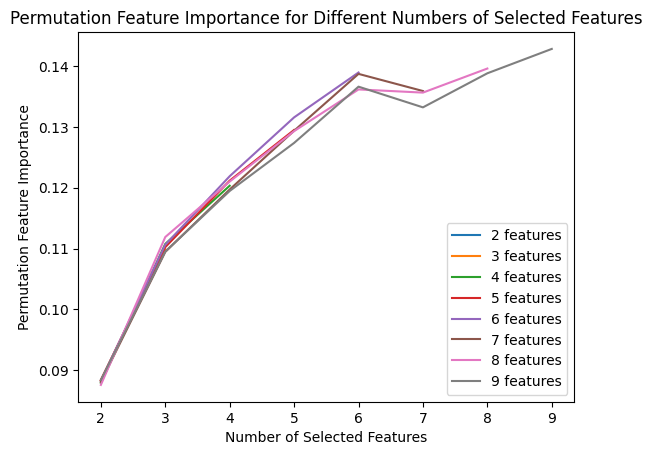

In [21]:
# explore the number of selected features for Permutation feature important
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

# Get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(2, 10):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        models[str(i)] = Pipeline(steps=[('s', rfe), ('m', model)])
    return models

# Evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# Get the dataset
X, y = get_dataset()

# Get the models to evaluate
models = get_models()

# Evaluate the models and store results
results, names = list(), list()

# Dictionary to store permutation importances for each number of selected features
perm_importances = {}

for name, model in models.items():
    # Fit the RFE instance with the training data
    model['s'].fit(X, y)

    # Get the indices of the most important features
    important_features = model['s'].get_support(indices=True)

    # Store permutation importances for each number of selected features
    perm_importances[name] = []

    # Perform permutation feature importance for each number of selected features
    for i in range(2, int(name) + 1):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        pipeline = Pipeline(steps=[('s', rfe), ('m', model)])

        # Fit the pipeline with the training data
        pipeline.fit(X, y)

        # Perform permutation feature importance
        result = permutation_importance(pipeline, X, y, n_repeats=10, random_state=42)

        # Get the mean importance value
        mean_importance = np.mean(result.importances_mean)

        # Store the mean importance value
        perm_importances[name].append(mean_importance)

# Plot permutation feature importance for each number of selected features
for name, importances in perm_importances.items():
    plt.plot(range(2, int(name) + 1), importances, label=f'{name} features')

plt.xlabel('Number of Selected Features')
plt.ylabel('Permutation Feature Importance')
plt.title('Permutation Feature Importance for Different Numbers of Selected Features')
plt.legend()
plt.show()

จำนวนฟีเจอร์ที่ดีที่สุดคือ 8 เนื่องจากสอดคล้องกับความแม่นยำสูงสุดที่ 0.15 อย่างไรก็ตาม สิ่งสำคัญที่ควรทราบก็คือความแตกต่างในความแม่นยำระหว่างฟีเจอร์ 9 และ 7 นั้นค่อนข้างน้อย ดังนั้นจำนวนฟีเจอร์ที่เหมาะสมที่สุดอาจขึ้นอยู่กับปัจจัยอื่นๆ

## **Select features**

In [22]:
# evaluation of a model using all features
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# define the dataset
X, y = get_dataset()
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 75.97


In [23]:
#evaluation of a model using 5 features chosen with REF
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X, y = get_dataset()
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using RFE
fs = RFE(estimator=RandomForestClassifier(n_estimators=1000), n_features_to_select=5)
X_train_fs = fs.fit_transform(X_train, y_train)
X_test_fs = fs.transform(X_test)

# Fit the Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)

# Evaluate the model
yhat = model.predict(X_test_fs)

# Evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f%%' % (accuracy * 100))

Accuracy: 77.27%


In [24]:
# evaluation of a model using 5 features chosen with Stat feature selection
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import chi2

X, y = get_dataset()
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using SelectKBest with chi-squared test
k_best = SelectKBest(score_func=chi2, k=5)
X_train_fs = k_best.fit_transform(X_train, y_train)
X_test_fs = k_best.transform(X_test)

# Fit the Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)

# Evaluate the model
yhat = model.predict(X_test_fs)

# Evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f%%' % (accuracy * 100))

Accuracy: 75.97%


In [25]:
#evaluation of a model using 8 features chosen with Permutation Feature Importance

X, y = get_dataset()
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier to get initial feature importance
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)

# Calculate permutation feature importance
perm_importance = permutation_importance(rf_model, X_train, y_train, n_repeats=10, random_state=42)

# Get indices of top 8 features based on permutation importance
top_features_indices = (-perm_importance.importances_mean).argsort()[:8]

# Select the top 8 features
X_train_perm_importance = X_train.iloc[:, top_features_indices]
X_test_perm_importance = X_test.iloc[:, top_features_indices]

# Fit the Logistic Regression model on selected features
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train_perm_importance, y_train)

# Evaluate the model
yhat = lr_model.predict(X_test_perm_importance)

# Evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f%%' % (accuracy * 100))

Accuracy: 75.97%


จากการ Result พบว่า model using 5 features chosen with REF ให้ประสิทธิภาพอยู่ที่ Accuracy: 77.27% ซึ่งสูงที่สุดจากท้ั้งหมด 3 วิธี

## **Feature Ranking**

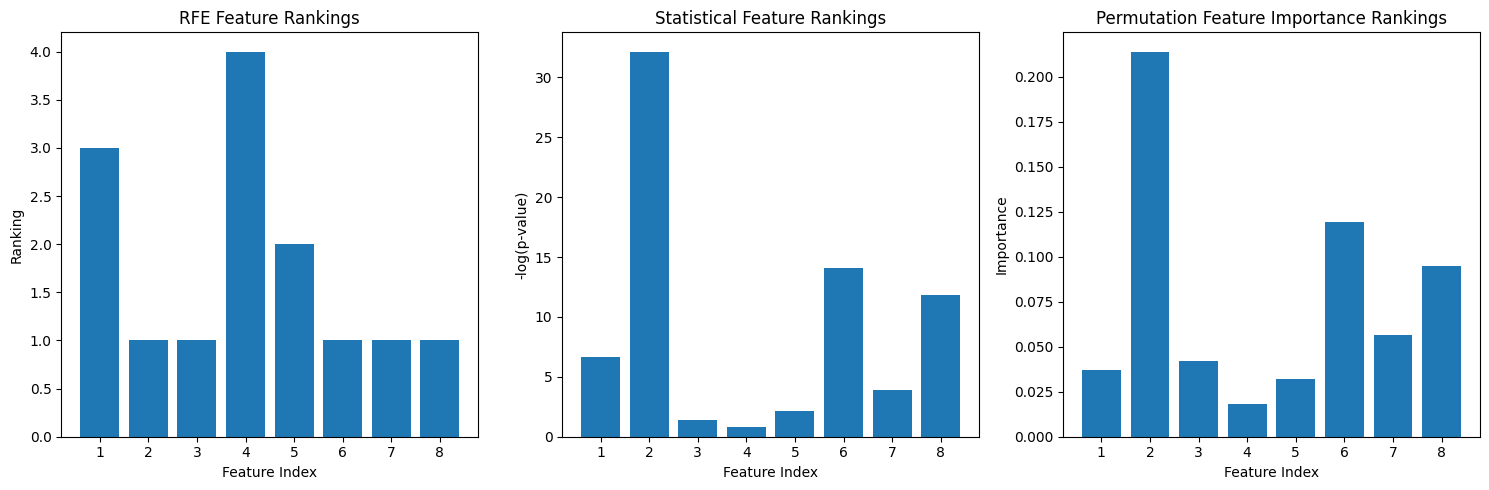

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.inspection import permutation_importance

X, y = get_dataset()
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model to the data
clf.fit(X, y)

# Function to get feature rankings from RFE
def get_rfe_feature_rankings(X, y, clf):
    rfe = RFE(clf, n_features_to_select=5)
    rfe.fit(X, y)
    rankings = rfe.ranking_
    return rankings

# Function to get feature rankings from Statistical feature selection
def get_stat_feature_rankings(X, y):
    skb = SelectKBest(f_classif, k='all')
    skb.fit(X, y)
    rankings = -np.log10(skb.pvalues_)
    return rankings

# Function to get feature rankings from Permutation Feature Importance
def get_permutation_feature_rankings(X, y, clf):
    result = permutation_importance(clf, X, y, n_repeats=8, random_state=42)
    rankings = result.importances_mean
    return rankings

# Get feature rankings for each method
rfe_rankings = get_rfe_feature_rankings(X_train, y_train, clf)
stat_rankings = get_stat_feature_rankings(X_train, y_train)
perm_rankings = get_permutation_feature_rankings(X_train, y_train, clf)

# Plot feature rankings
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(range(1, len(rfe_rankings) + 1), rfe_rankings)
plt.title('RFE Feature Rankings')
plt.xlabel('Feature Index')
plt.ylabel('Ranking')

plt.subplot(1, 3, 2)
plt.bar(range(1, len(stat_rankings) + 1), stat_rankings)
plt.title('Statistical Feature Rankings')
plt.xlabel('Feature Index')
plt.ylabel('-log(p-value)')

plt.subplot(1, 3, 3)
plt.bar(range(1, len(perm_rankings) + 1), perm_rankings)
plt.title('Permutation Feature Importance Rankings')
plt.xlabel('Feature Index')
plt.ylabel('Importance')

plt.tight_layout()
plt.show()



1.   Feature Index: This column shows the index of the features used in the model. The index ranges from 0 to 40.
2.   RFE Feature Rankings: This column shows the ranking of the features based on the Recursive Feature Elimination (RFE) method. The ranking ranges from 0 to 20.0, with lower values indicating more important features.
3.  Statistical Feature Rankings: This column shows the ranking of the features based on statistical measures. The ranking ranges from 0.0 to 20.0, with lower values indicating more important features.
4. Permutation Feature Importance Rankings: This column shows the ranking of the features based on permutation feature importance. The ranking ranges from 0.0 to 20.0, with lower values indicating more important features.



---
โดยรวมแล้ว feature index 2,3,6,7 และ 8 ของวิธี REF เหมาะสม

โดยรวมแล้ว feature index 1,3,4,5 และ 7 ของวิธี Stat feature selection เหมาะสม

โดยรวมแล้ว feature index 2 เพียงอันเดียวที่ไม่เหมาะสม